## Fire up necessary modules

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline  

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [16]:
# In GraphLab Jupyter Notebook: Save SFrame to csv and create pandas DataFrame from csv
# import graphlab
# sf = graphlab.SFrame('/Users/lvg/Downloads/home_data.gl/') 
# sf.save('Downloads/home_data.csv', format='csv')
# df = pandas.read_csv('Downloads/home_data.csv')

In [17]:
df = pd.read_csv('home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# Display all columns, 10 rows 
pd.set_option('display.max_columns', 500)
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Aside: converting to datetime

In [19]:
df.date = pd.to_datetime(df.date, format='%Y%m%dT000000')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


## Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

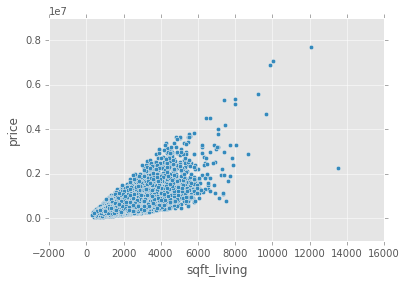

In [20]:
df.plot.scatter(x="sqft_living", y="price")

In [22]:
# Plot is very small?
# matplotlib.rcParams['figure.figsize'] # Change default plot size
# matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
# df.plot.scatter(x="sqft_living", y="price")

## Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use random_state=0 so that everyone running this notebook gets the same results.  

In [23]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=0)

X_train=train_data.sqft_living
X_train=X_train.reshape(-1, 1)

y_train=train_data.price
y_train=y_train.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Why reshape? X and y must be of shape [n_samples, n_(features/targets)]

# regr.fit Parameters:	
# X : numpy array or sparse matrix of shape [n_samples,n_features]
# Training data
# y : numpy array of shape [n_samples, n_targets]
# Target values
# sample_weight : numpy array of shape [n_samples]
# Individual weights for each sample
# New in version 0.17: parameter sample_weight support to LinearRegression.
# Returns:	
# self : returns an instance of self.

print X_train.shape
print y_train.shape

(17290, 1)
(17290, 1)


In [25]:
# Max Error & RMSE

X_test=test_data.sqft_living.reshape(-1, 1)

y_test=test_data.price.reshape(-1, 1)

y_pred=regr.predict(X_test)

print("Max Error : %.2f" % np.max(np.absolute(y_pred - y_test)))
print
print("We can calculate MSE 'by hand' or have sklearn do it for us")
print("MSE : %.2f" % np.mean((y_pred - y_test) ** 2))
print("MSE : %.2f" % mean_squared_error(y_test, y_pred))
print
print("RMSE is just the square root of MSE")
print("RMSE : %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

Max Error : 3005746.34

We can calculate MSE 'by hand' or have sklearn do it for us
MSE : 61940787221.50
MSE : 61940787221.50

RMSE is just the square root of MSE
RMSE : 248879.06


RMSE of about \$248,879!

## Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

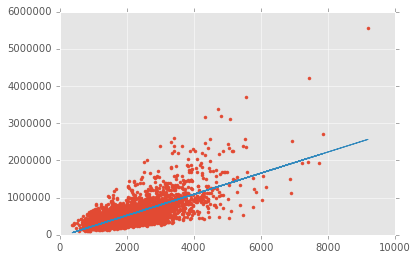

In [30]:
# matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
plt.plot(X_test,y_test,'.',
         X_test,y_pred,'-')

Above:  red dots are original data, blue line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [31]:
print regr.intercept_
print regr.coef_

[-48257.06345556]
[[ 283.96855737]]


## Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [32]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [33]:
df[my_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


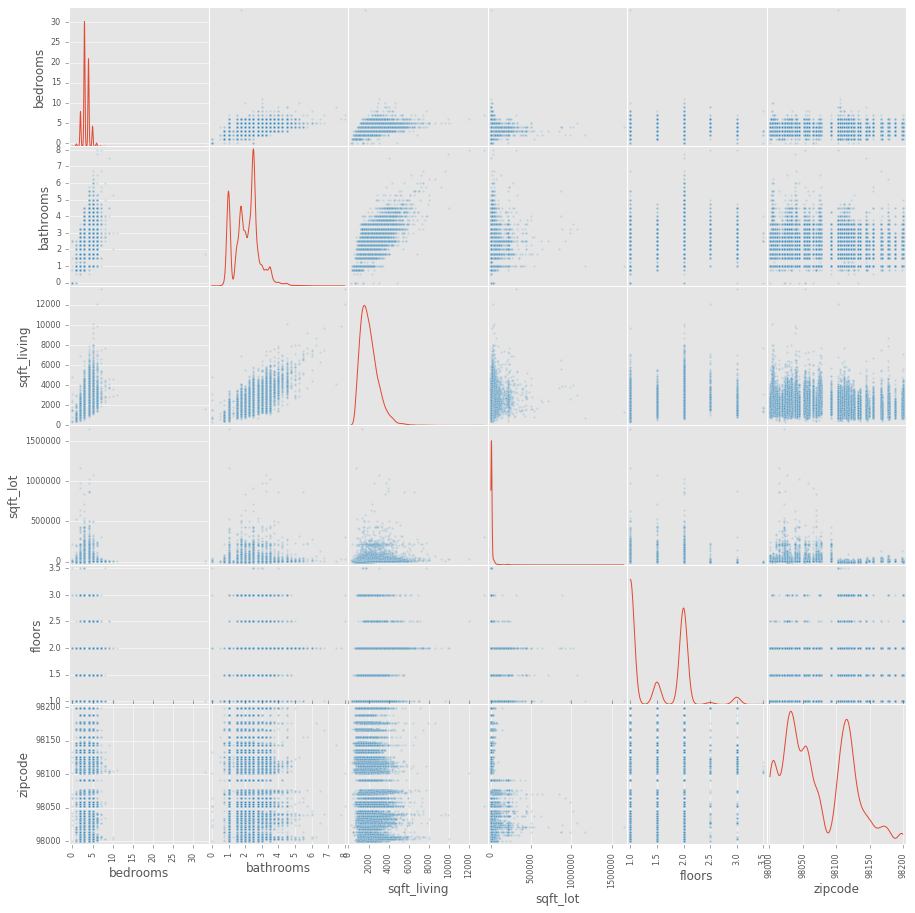

In [34]:
# Aside: scatterplot matrix
scatter_matrix(df[my_features], alpha=0.2, figsize=(15,15), diagonal='kde');

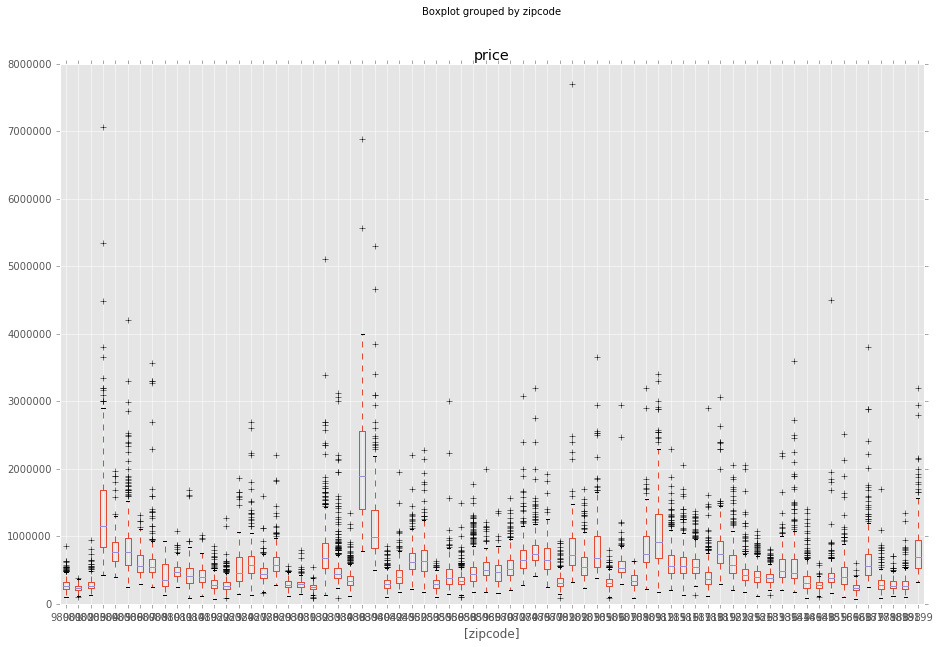

In [35]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
df[['price','zipcode']].boxplot(by='zipcode');

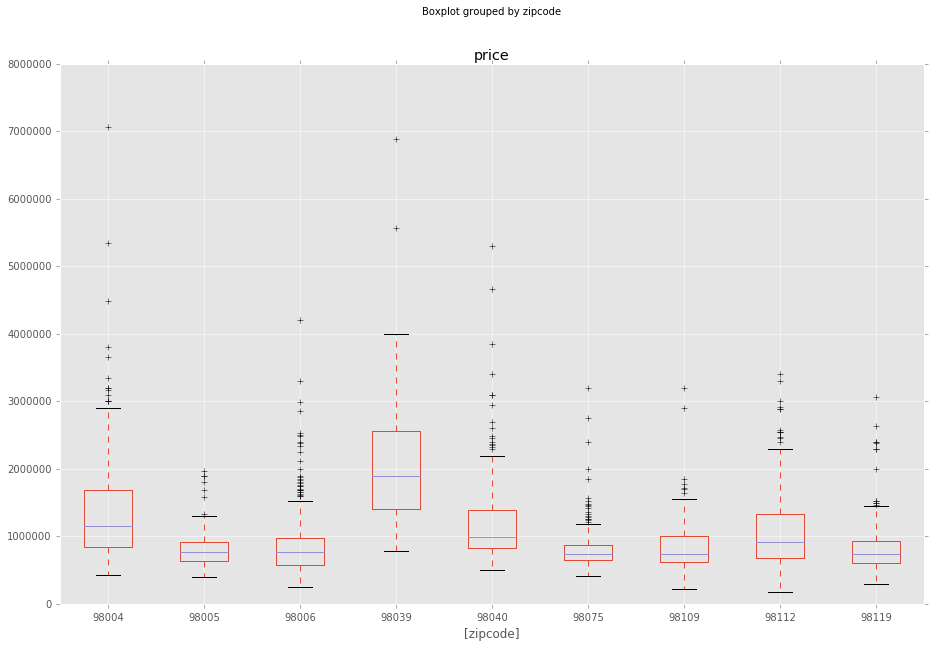

In [40]:
# Sort 
med = df.groupby('zipcode')['price'].median()
med.sort_values(ascending=False, inplace=True)
df_top = df[[z in med.index[0:9] for z in df.zipcode]]
df_top[['price','zipcode']].boxplot(by='zipcode');

98039 is the most expensive zip code.

## Build a regression model with more features

In [41]:
X_train2=train_data[my_features]
X_train2=np.array(X_train2)

y_train=train_data.price
y_train=y_train.reshape(-1, 1)

regr2 = linear_model.LinearRegression()
regr2.fit(X=X_train2, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


### Comparing the results of the simple model with adding more features

In [43]:
# Max Error & RMSE

X_test2=test_data[my_features]
X_test2=np.array(X_test2)

y_test=test_data.price
y_test=y_test.reshape(-1, 1)

y_pred2=regr2.predict(X_test2)

print("Max Error Model 1: %.2f" % np.max(np.absolute(y_pred - y_test)))
print("Max Error Model 2: %.2f" % np.max(np.absolute(y_pred2 - y_test)))
print
print("RMSE Model 1: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE Model 2: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred2)))

Max Error Model 1: 3005746.34
Max Error Model 2: 2829477.00

RMSE Model 1: 248879.06
RMSE Model 2: 244004.77


The RMSE goes down from \$248,879 to \$244,005 with more features.

## Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [44]:
# add price to the mix 
my_features_y = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'price']

In [45]:
print my_features_y

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'price']


In [46]:
house1 = df[df['id']==5309101200]

In [47]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [48]:
house1.price

1054    620000
Name: price, dtype: int64

In [49]:
print regr.predict(house1['sqft_living'].reshape(-1, 1))

[[ 633267.47422744]]


In [50]:
print regr2.predict(house1[my_features])

[[ 637556.26515925]]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

### Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [51]:
house2 = df[df['id']==1925069082]

In [52]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,2015-05-11,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [53]:
house2.price

1361    2200000
Name: price, dtype: int64

In [54]:
print regr.predict(house2['sqft_living'].reshape(-1, 1))

[[ 1269357.04273158]]


In [55]:
print regr2.predict(house2[my_features])

[[ 1274443.76531345]]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [56]:
bill_gates = pd.DataFrame(
             {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]})

In [57]:
bill_gates

,bathrooms,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,25,8,10,4,10,47.627606,-122.242054,37500,12500,50000,5000,225000,40000,4,1,1994,2010,98039


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [58]:
print regr.predict(bill_gates['sqft_living'].reshape(-1, 1))

[[ 14150170.80494035]]


In [59]:
print regr2.predict(bill_gates[my_features])

[[ 15796988.23574103]]


The models predict a price of \$14M-\$16M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)